#### Bases de l'Apprentissage
#### TP 1 - Décision Bayésienne
---

**Yuri DE SENE ALVIZI**


**1. Préliminaires**

In [289]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm
from numpy.linalg import eig
import scipy
import math
from numpy.linalg import det


**2. Génération d'une variable aléatoire gaussienne**

En utilisant la fonction randn, générer N échantillons d'une variable aléatoire gaussienne de moyenne 3 et de variance 4. Etudier l'évolution de la moyenne et de la variance empiriques en fonction de N.

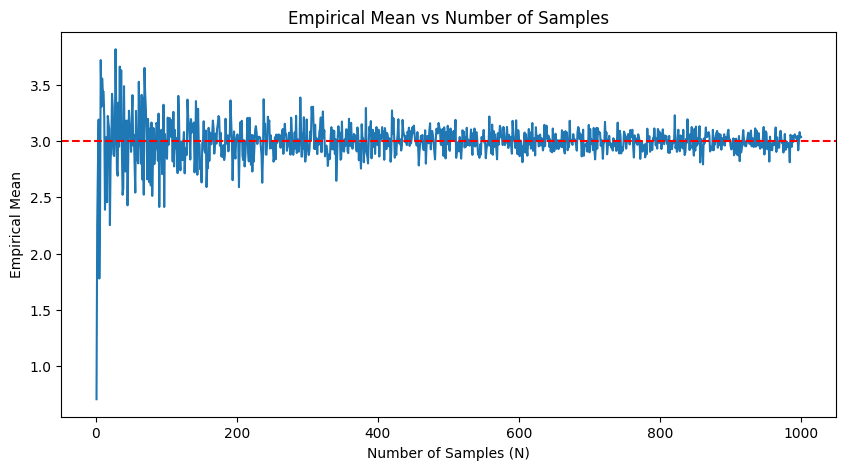

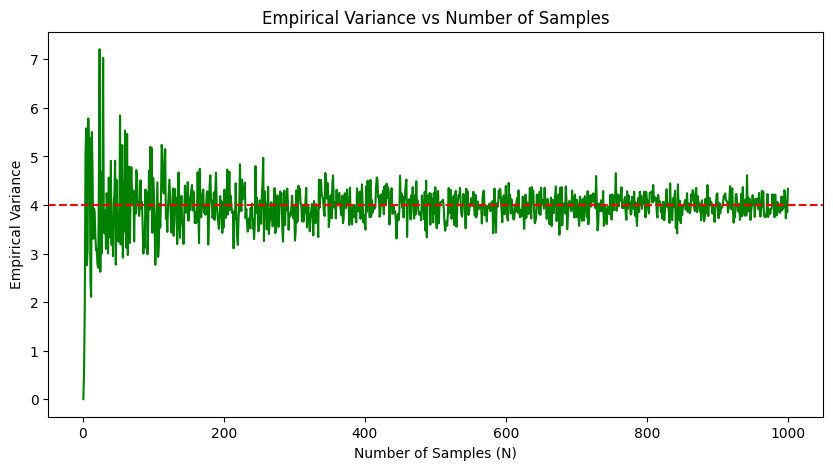

In [290]:
mean = 3
variance = 4

empirical_mean = []
empirical_variance = []

for N in range(1, 1001):
    samples = np.random.randn(N) * np.sqrt(variance) + mean
    empirical_mean.append(np.mean(samples))
    empirical_variance.append(np.var(samples))

# Empirical mean plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_mean)
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Mean')
plt.axhline(y=mean, color='r', linestyle='--')
plt.title('Empirical Mean vs Number of Samples')
plt.show()

# Empirical variance plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 1001), empirical_variance, color='green')
plt.xlabel('Number of Samples (N)')
plt.ylabel('Empirical Variance')
plt.axhline(y=variance, color='r', linestyle='--')
plt.title('Empirical Variance vs Number of Samples')
plt.show()

<div style="background-color: #5e5e5e; color: white;">
La moyenne empirique et la variance se rapprochent des valeurs spécifiées à mesure que N augmente, comme le montrent les graphiques ci-dessus.
</div>

**3. Génération de vecteurs aléatoires gaussiens**

On va générer en dimension 2, un ensemble d'apprentissage constitué de trois classes d'échantillons suivant des lois normales, de vecteurs moyenne et de matrices de covariance donnés.

In [291]:
def generate_samples(N, mean, cov):
    normal_samples = np.random.randn(2, N)
    mean_vector = np.tile(mean, (N, 1)).T
    samples = np.dot(sqrtm(cov), normal_samples) + mean_vector
    return samples

**3.1)** Générer un échantillon de taille N=100 d'un vecteur aléatoire gaussien défini par le vecteur moyenne m=[4 9] et la matrice de covariance égale à l'identité. Afficher les échantillons.

Empirical mean: [3.79834524 9.04603885]
Empirical cov:
[[ 0.88159609 -0.06840204]
 [-0.06840204  1.18643566]]


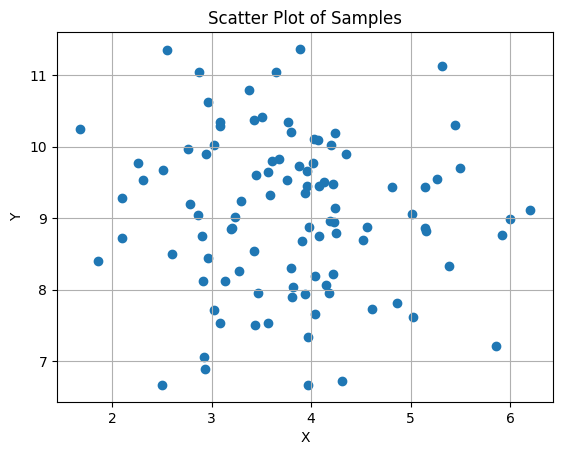

In [292]:
# parameters
N = 100
mean = np.array([4, 9])
cov = np.eye(2)

# introduce covariance matrix and mean
# samples = np.random.multivariate_normal(m, cov, N)
samples = generate_samples(N, mean, cov)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**3.2)** Donner l'expression permettant de générer N=100 échantillons d'un vecteur aléatoire de moyenne m=[4 9] et de matrice de covariance diagonale s= [1 0 ; 0 6] Vérifier votre résultat en utilisant les fonctions mean et cov et afficher les échantillons.

Empirical mean: [4.17868267 8.98907854]
Empirical cov:
[[ 0.84943937 -0.28031424]
 [-0.28031424  6.96055672]]


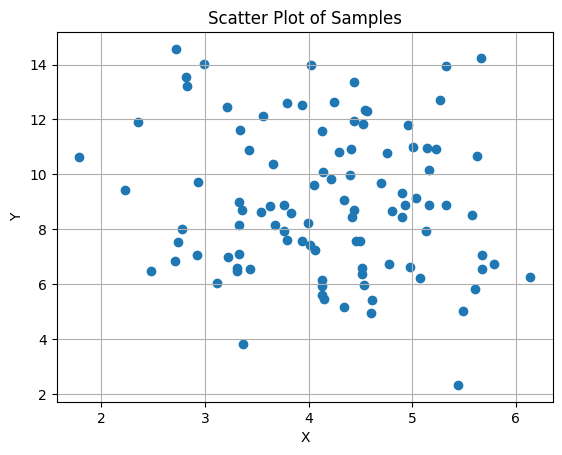

In [293]:
N = 100
mean = np.array([4, 9])
cov = np.array([[1, 0], [0, 6]])

# samples = np.random.multivariate_normal(m, s, N)
samples = generate_samples(N, mean, cov)

print(f'Empirical mean: {np.mean(samples, axis=1)}')
print(f'Empirical cov:\n{np.cov(samples)}')

plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


**3.3)** Soit X un vecteur aléatoire gaussien centré de matrice de covariance égale à l'identité. Chercher une transformation linéaire X'= U X qui permette d'obtenir un vecteur aléatoire centré de matrice de covariance S.

<div style="background-color: #5e5e5e; color: white;">
Pour obtenir un vecteur aléatoire centré X' avec une matrice de covariance spécifique S à partir d'un vecteur aléatoire gaussien centré X dont la matrice de covariance est l'identité, nous pouvons utiliser une transformation linéaire X' = UX, où U est une matrice de transformation appropriée. La décomposition de Cholesky est particulièrement adaptée lorsque S est symétrique et définie positive, ce qui est le cas des matrices de covariance.

La décomposition de Cholesky de S est une décomposition sous la forme:
$$ S = LL^T $$
où L est une matrice triangulaire inférieure avec des éléments positifs sur sa diagonale. Cette décomposition est unique pour les matrices symétriques et définies positives.

Pour transformer X en X' ayant la matrice de covariance S, nous pouvons prendre U égale à L de la décomposition de Cholesky de S. La transformation linéaire que nous recherchons est donc:
$$ X' = UX = LX $$
Cette approche garantit que X' aura la matrice de covariance désirée S, car:
$$ \text{Cov}(X') = E[(LX)(LX)^T] = LE[XX^T]L^T = LIL^T = LL^T = S $$

**3.4)** Générer des échantillons dont la matrice de covariance est égale à s = [2 2 ; 2 5]

Vérifier votre résultat avec les fonctions mean et cov.



Empirical mean of X': [0.11195553 0.01829205]
Empirical covariance of X':
[[2.42778241 2.47570357]
 [2.47570357 4.97965634]]


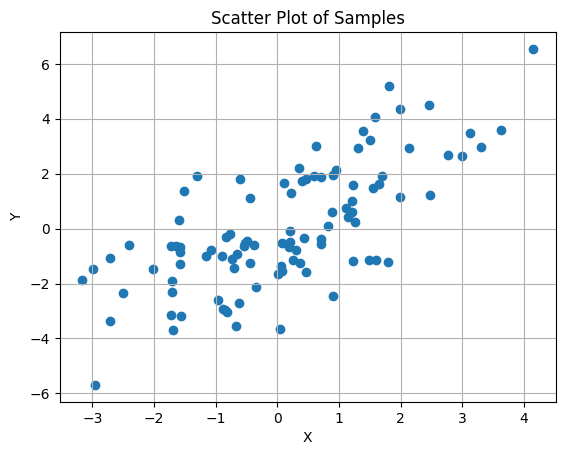

In [294]:
N = 100
X = np.random.randn(2, N)
s = np.array([[2, 2], [2, 5]])

# U is the lower triangular matrix of the Cholesky decomposition
U = np.linalg.cholesky(s)

# Apply the linear transformation to obtain X'
X_prime = np.dot(U, X)

X_prime_mean = np.mean(X_prime, axis=1)
X_prime_cov = np.cov(X_prime)

print(f"Empirical mean of X': {X_prime_mean}")
print(f"Empirical covariance of X':\n{X_prime_cov}")

plt.scatter(X_prime[0], X_prime[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()


Calculer l'orientation de l'ellipsoide de Mahalanobis asscocié à s.


In [295]:
a = 0.5 * np.arctan2(2 * s[0, 1], s[0, 0] - s[1, 1])
a = math.degrees(a)
print(f'Angle of rotation: {round(a, 2)}º')

Angle of rotation: 63.43º



Vérifier la relation liant s à sa matrice diagonalisée Sd : s=V.Sd.Vt avec V, matrice des vecteurs propres de s.

In [296]:
eigenvalues, eigenvectors = eig(s)

Sd = np.diag(eigenvalues)
V = eigenvectors

s_prime = np.dot(np.dot(V, Sd), V.T)
print(f'Original covariance matrix:\n{s}')
print(f'Rotated covariance matrix:\n{s_prime}')

Original covariance matrix:
[[2 2]
 [2 5]]
Rotated covariance matrix:
[[2. 2.]
 [2. 5.]]


**3.5)** Générer dans les matrices x1, x2, x3, trois vecteurs aléatoires gaussiens en dimension 2 (100 échantillons par vecteur). On donne:

m1 = [4 9] s1 = [2 2, 2 5]

m2 = [8.5 7.5] s2 = [2 - 2, - 2 5 ]

m3 = [6 3.5] s3 = [7 - 4, - 4 7 ]

Afficher l'ensemble des échantillons, chaque classe dans une couleur différente.



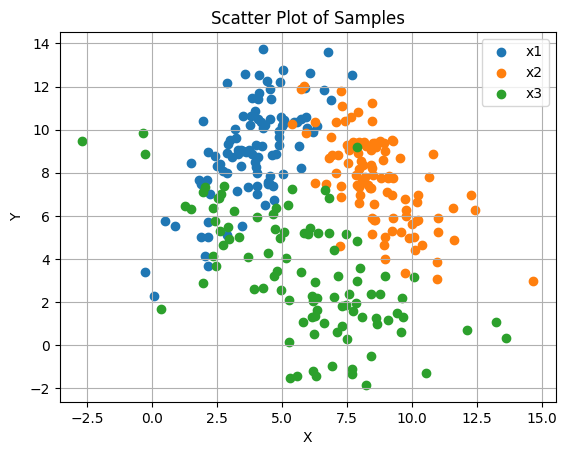

In [297]:
N = 100

m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])

m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])

m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])

x1 = generate_samples(N, m1, s1)
x2 = generate_samples(N, m2, s2)
x3 = generate_samples(N, m3, s3)

# print(f'Empirical mean of x1: {np.mean(x1, axis=1)}')
# print(f'Empirical cov of x1:\n{np.cov(x1)}')
# print(f'Empirical mean of x2: {np.mean(x2, axis=1)}')
# print(f'Empirical cov of x2:\n{np.cov(x2)}')
# print(f'Empirical mean of x3: {np.mean(x3, axis=1)}')
# print(f'Empirical cov of x3:\n{np.cov(x3)}')

plt.scatter(x1[0], x1[1], label='x1')
plt.scatter(x2[0], x2[1], label='x2')
plt.scatter(x3[0], x3[1], label='x3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.title('Scatter Plot of Samples')
plt.show()



**4. Courbes d'équidensité**

**4.1)** Ouvrir une autre fenêtre. Créer une grille de points X(i), Y(j) répartis régulièrement dans l'espace de taille 57x57 entre les valeurs 0.27 et 12.5 pour la première mesure et -2 et 15 pour la deuxième mesure (Utiliser la fonction linspace).

In [298]:
x_min = 0.27
x_max = 12.5
y_min = -2
y_max = 15

grid_size = 57

X, Y = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))

# plt.scatter(X, Y)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.grid(True)
# plt.title('Scatter Plot of Samples')
# plt.show()

**4.2)** Pour la classe 1 de la question 3.5, construire la matrice dens1(i,j) contenant la densité de probabilité conditionnelle en chaque point (X(i), Y(j)) de la grille.

In [299]:
def gaussian_pdf(mean, cov, X, Y):
    grid_size = X.shape[0]
    dens = np.zeros(X.shape)
    
    denominator = 2 * np.pi * np.sqrt(det(cov))
    inv_cov = np.linalg.inv(cov)

    for i in range(grid_size):
        for j in range(grid_size):
            x = np.array([X[i, j], Y[i, j]])
            diff = x - mean
            dens[i, j] = np.exp(-0.5 * np.dot(diff.T, np.dot(inv_cov, diff))) / denominator
    
    return dens

In [300]:
dens1 = gaussian_pdf(m1, s1, X, Y)

**4.3)** Afficher les courbes d'équidensités pour la classe 1 à l'aide de la fonction contour. Quelle est la forme de ces courbes ?


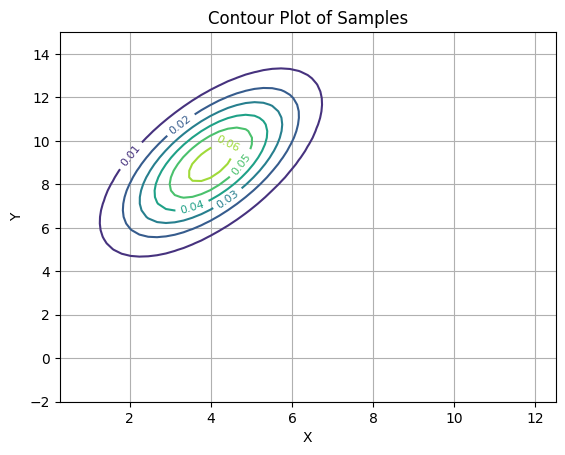

In [301]:
plt.figure()
contour = plt.contour(X, Y, dens1)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Contour Plot of Samples')
plt.show()

<div style="background-color: #5e5e5e; color: white;">
La forme des courbes est elliptique
</div>


**4.4)** Faire de même pour les deux autres classes. Représenter en 3-D sur la même figure les trois lois de densités conditionnelles (utiliser la fonction mesh).
Expliquer l'allure des amplitudes maximales des lois de densités

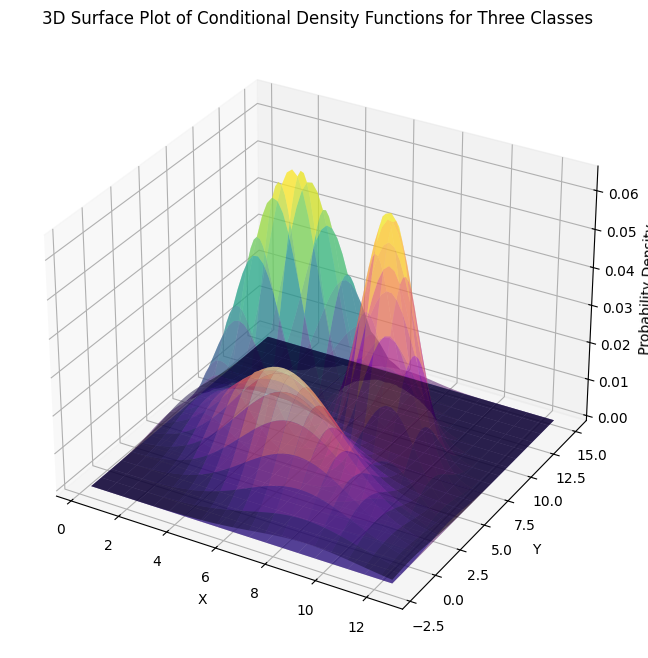

In [302]:
dens1 = gaussian_pdf(m1, s1, X, Y)
dens2 = gaussian_pdf(m2, s2, X, Y)
dens3 = gaussian_pdf(m3, s3, X, Y)

Z1 = dens1
Z2 = dens2
Z3 = dens3

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Class 1
ax.plot_surface(X, Y, dens1, cmap='viridis', alpha=0.5, rstride=3, cstride=3, edgecolor='none')
# Class 2
ax.plot_surface(X, Y, dens2, cmap='plasma',  alpha=0.5, rstride=3, cstride=3, edgecolor='none')
# Class 3
ax.plot_surface(X, Y, dens3, cmap='magma',   alpha=0.5, rstride=3, cstride=3, edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('3D Surface Plot of Conditional Density Functions for Three Classes')
plt.show()


<div style="background-color: #5e5e5e; color: white;">
L'allure des amplitudes maximales de ces lois de densité reflète la dispersion des données de chaque classe autour de leur moyenne dans le plan. Plus la variance (ou les valeurs propres de la matrice de covariance) est élevée dans une direction donnée, plus l'amplitude maximale de la densité sera étendue dans cette direction. Ceci explique le fait que les classes 1 et 2 (avec des variances 2 et 5 pour chaque axe) ont des pics plus élevés que la classe 3 (avec une variance 7 pour les deux axes) dans le graphique ci-dessus.
</div> 

**5. Visualisation des frontières**

**5.1)** Classer les points (X(i), Y(j)) de la grille précédente. On utilisera une matrice Z(i,j) dont les éléments contiendront l'étiquette (1, 2 ou 3) de la classe obtenue pour chacun des éléments de la grille.

In [303]:
Z = np.zeros_like(X, dtype=int)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = np.argmax([dens1[i, j], dens2[i, j], dens3[i, j]]) + 1 

print(Z)

[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]


**5.2)** Pour faire apparaître les frontières entre classes, appliquer la fonction contour à la transposée de Z et aux vecteurs X et Y. Indiquez les régions de l'espace correspondant à chacune des classes ?
On pourra superposer les frontières aux points échantillons.

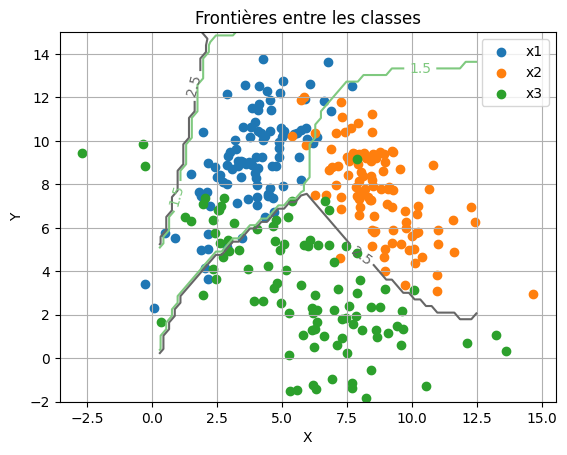

In [304]:
# Les niveaux sont choisis pour être entre les classes
# Pour 3 classes, nous avons besoin de 2 frontières, donc les niveaux sont pris entre les valeurs des classes
plt.scatter(x1[0], x1[1], label='x1')
plt.scatter(x2[0], x2[1], label='x2')
plt.scatter(x3[0], x3[1], label='x3')

contour_levels = [1.5, 2.5]
contour_plot = plt.contour(X, Y, Z, levels=contour_levels, cmap="Accent")
plt.clabel(contour_plot, inline=1, fontsize=10)
plt.title('Frontières entre les classes')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()

**6. Application**

Cette application est issue du Cars dataset (collecté par E. Ramos et D. Donoho et entreposé dans la bibliothèque StatLib). Cet ensemble contient environ 400 échantillons
représentant des modèles de voitures et 8 variables les décrivent. La dernière variable est la classe des échantillons, c-a-d le continent d’origine du modèle : USA (1), Europe (2), Asie (3). Les modèles voitures ne sont pas équirépartis suivant les continents.

On veut prédire la classe du modèle (le continent d’origine) à partir de deux variables :

- MPG : miles per gallon relatif à la consommation du véhicule (en position 1)
- weight : le poids de la voiture (en position 5)

Déterminer le vecteur moyenne et la matrice de covariance de chacune des classes.

Tracer les frontières entre classes à partir des échantillons fournis dans le fichier voitures.mat (load voitures renvoie dans la variable cars l’ensemble des échantillons).

In [305]:
# Load the samples from the voitures.mat file
data = scipy.io.loadmat('voitures.mat')
samples = data['cars']

# Separate the samples based on their class
class1_samples = samples[samples[:, -1] == 1]
class2_samples = samples[samples[:, -1] == 2]
class3_samples = samples[samples[:, -1] == 3]

# Calculate the mean vector and covariance matrix for each class
class1_mean = np.mean(class1_samples[:, [0, 4]], axis=0)
class1_cov = np.cov(class1_samples[:, [0, 4]].T)

class2_mean = np.mean(class2_samples[:, [0, 4]], axis=0)
class2_cov = np.cov(class2_samples[:, [0, 4]].T)

class3_mean = np.mean(class3_samples[:, [0, 4]], axis=0)
class3_cov = np.cov(class3_samples[:, [0, 4]].T)

print("Class 1:")
print("Mean Vector:", class1_mean)
print("Covariance Matrix:")
print(class1_cov)

print("Class 2:")
print("Mean Vector:", class2_mean)
print("Covariance Matrix:")
print(class2_cov)

print("Class 3:")
print("Mean Vector:", class3_mean)
print("Covariance Matrix:")
print(class3_cov)


Class 1:
Mean Vector: [  20.03346939 3372.48979592]
Covariance Matrix:
[[ 4.14785473e+01 -4.33566974e+03]
 [-4.33566974e+03  6.32576357e+05]]
Class 2:
Mean Vector: [  27.60294118 2433.47058824]
Covariance Matrix:
[[ 4.32987972e+01 -1.65698349e+03]
 [-1.65698349e+03  2.41880880e+05]]
Class 3:
Mean Vector: [  30.45063291 2221.2278481 ]
Covariance Matrix:
[[ 3.70886855e+01 -1.10104758e+03]
 [-1.10104758e+03  1.02718486e+05]]


In [306]:
x_min = 5
x_max = 60
y_min = 1400
y_max = 5000

grid_size = 57

X, Y = np.meshgrid(np.linspace(x_min, x_max, grid_size), np.linspace(y_min, y_max, grid_size))

class1_dens = gaussian_pdf(class1_mean, class1_cov, X, Y)
class2_dens = gaussian_pdf(class2_mean, class2_cov, X, Y)
class3_dens = gaussian_pdf(class3_mean, class3_cov, X, Y)

Z = np.zeros_like(X, dtype=int)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = np.argmax([class1_dens[i, j], class2_dens[i, j], class3_dens[i, j]]) + 1 


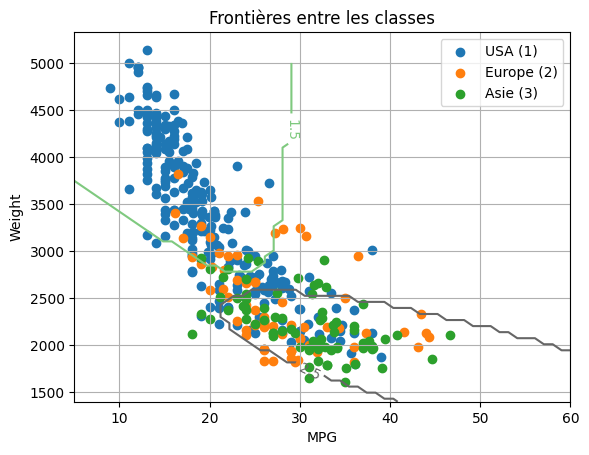

In [308]:
x1 = np.array([class1_samples[:, 0], class1_samples[:, 4]])
x2 = np.array([class2_samples[:, 0], class2_samples[:, 4]])
x3 = np.array([class3_samples[:, 0], class3_samples[:, 4]])

plt.scatter(x1[0], x1[1], label='USA (1)')
plt.scatter(x2[0], x2[1], label='Europe (2)')
plt.scatter(x3[0], x3[1], label='Asie (3)')

# The levels are chosen to be between the classes
# For 3 classes, we need 2 boundaries, so the levels are taken between the values of the classes
contour_levels = [1.5, 2.5]
contour_plot = plt.contour(X, Y, Z, levels=contour_levels, cmap="Accent")
plt.clabel(contour_plot, inline=1, fontsize=10)
plt.title('Frontières entre les classes')
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.grid(True)
plt.legend()
plt.show()